In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
seed = 9
df1 = pd.read_csv("results/nels_small_etas_4-2-24_seed_{}_method_partial_deriv_loss_beta_train.csv".format(seed))
df2 = pd.read_csv("results/nels_small_etas_4-2-24_seed_{}_method_total_deriv_train.csv".format(seed))

In [3]:
df3 = pd.read_csv("results/nels_small_months_attended_4-2-24_seed_{}_method_partial_deriv_loss_beta_train.csv".format(seed))
df4 = pd.read_csv("results/nels_months_attended_4-2-24_seed_{}_method_total_deriv_train.csv".format(seed))

In [4]:
df5 = pd.read_csv("results/nels_socio_econ_4-2-24_seed_{}_method_partial_deriv_loss_beta_train.csv".format(seed))
df6 = pd.read_csv("results/nels_socio_econ_4-2-24_seed_{}_method_total_deriv_train.csv".format(seed))

In [5]:
def conversion_method(arr):
    l = []
    for s in arr:
        t = s[1:-1].split(", ")
        t = [float(x) for x in t]
        l.append(np.array(t).reshape(10, 1))
    return l

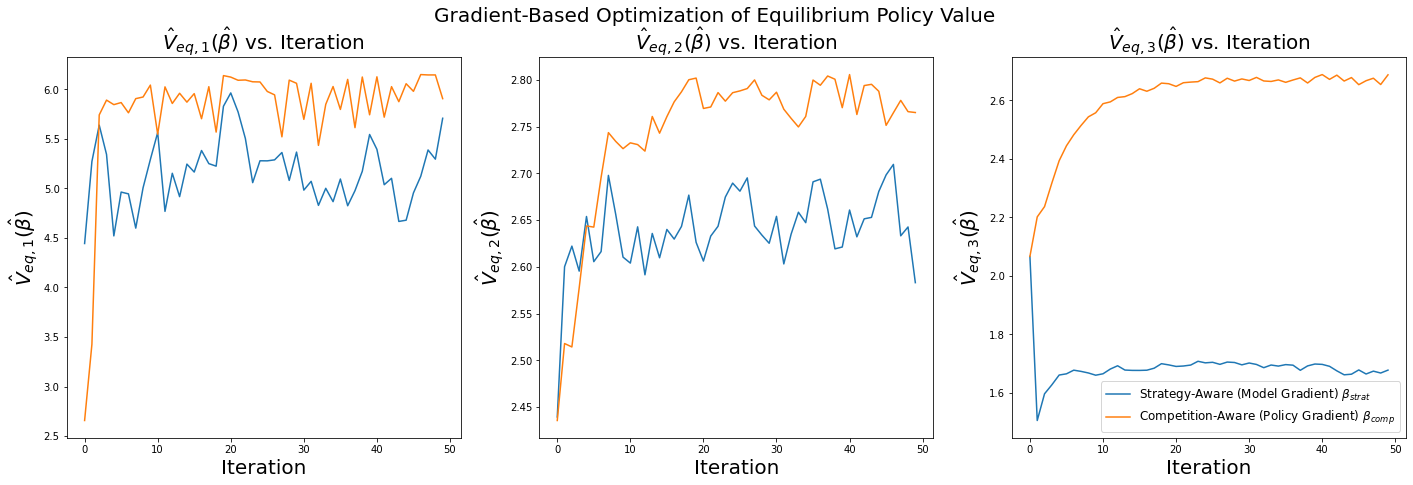

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(24, 7))
ax[0].plot(df3["iteration"], -df3["loss"], label="Strategy-Aware (Model Gradient) " + r"$\beta_{strat}$")
ax[0].plot(df4["iteration"], -df4["loss"], label="Competition-Aware (Policy Gradient) " + r"$\beta_{comp}$")
ax[1].plot(df1["iteration"], -df1["loss"], label="Strategy-Aware (Model Gradient) " + r"$\beta_{strat}$")
ax[1].plot(df2["iteration"], -df2["loss"], label="Competition-Aware (Policy Gradient) " + r"$\beta_{comp}$")
ax[2].plot(df5["iteration"], -df5["loss"], label="Strategy-Aware (Model Gradient) " + r"$\beta_{strat}$")
ax[2].plot(df6["iteration"], -df6["loss"], label="Competition-Aware (Policy Gradient) " + r"$\beta_{comp}$")

ax[0].set_xlabel("Iteration", fontsize=20)
ax[1].set_xlabel("Iteration", fontsize=20)
ax[2].set_xlabel("Iteration", fontsize=20)

ax[0].set_ylabel(r"$\hat{V}_{eq, 1}(\hat{\beta})$", fontsize=20)
ax[1].set_ylabel(r"$\hat{V}_{eq, 2}(\hat{\beta})$", fontsize=20)
ax[2].set_ylabel(r"$\hat{V}_{eq, 3}(\hat{\beta})$", fontsize=20)

ax[0].set_title(r"$\hat{V}_{eq, 1}(\hat{\beta})$" + " vs. Iteration", fontsize=20)
ax[1].set_title(r"$\hat{V}_{eq, 2}(\hat{\beta})$" + " vs. Iteration", fontsize=20)
ax[2].set_title(r"$\hat{V}_{eq, 3}(\hat{\beta})$" + " vs. Iteration", fontsize=20)

plt.legend(fontsize=12)
plt.suptitle("Gradient-Based Optimization of Equilibrium Policy Value", fontsize=20)
plt.savefig("figs/paper-figure-3.pdf", bbox_inches='tight')